In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize

import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

# Neural Network Architectures
## Live Demos

In [3]:
# Already trained on ImageNet
# Also it can be - weights = 'random'
model = VGG19()

In [4]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
# cat_image = imread("https://a57.foxnews.com/static.foxnews.com/foxnews.com/content/uploads/2019/09/931/524/cat-getty-images.jpg?ve=1&tl=1")
cat_image = imread("cat-getty-images.jpg")

In [6]:
cat_image.shape

(524, 931, 3)

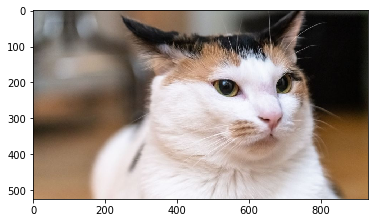

In [7]:
plt.imshow(cat_image)

In [8]:
# preprocess_input(cat_image).mean()

# Seems the size is not changed by preprocessing
# preprocess_input(cat_image).shape

cat_image_resized = resize(cat_image, (224, 224))

In [9]:
# Multiplication is important!
cat_image_preprocessed = preprocess_input(cat_image_resized * 255)

In [10]:
cat_image_preprocessed.shape

(224, 224, 3)

In [11]:
# Array has to be supplied to the model -  (1, 224, 224, 3)
cat_image_preprocessed_batch = np.array([cat_image_preprocessed])

In [12]:
predictions = model.predict(cat_image_preprocessed_batch)

In [13]:
decode_predictions(predictions, top=10)

[[('n02124075', 'Egyptian_cat', 0.32240307),
  ('n02127052', 'lynx', 0.10496333),
  ('n02123159', 'tiger_cat', 0.081188284),
  ('n02123045', 'tabby', 0.042621095),
  ('n02123597', 'Siamese_cat', 0.026843386),
  ('n03958227', 'plastic_bag', 0.019603422),
  ('n02883205', 'bow_tie', 0.015578399),
  ('n02808304', 'bath_towel', 0.014350557),
  ('n02109961', 'Eskimo_dog', 0.014122346),
  ('n02971356', 'carton', 0.012787932)]]